In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


pd.options.display.max_columns = None

In [4]:
df = pd.read_csv('./input/loans.csv')

#loan_data['issue_date'] = pd.to_datetime(loan_data['issue_date'], format = '%b-%y')
#loan_data['earliest_credit_line'] = pd.to_datetime(loan_data['earliest_credit_line'], format = '%b-%y')

#Create Target Variable
df['Is_Good'] = np.where(df['loan_status'].isin(['Charged Off', 'Default',                                                       
                                                       'Late (> 90 days)']), 0, 1)
# We create a new variable that has the value of '0' if a condition is met, and the value of '1' if it is not met. Create a scorce Card

# Drop irrelevant columns
df.drop(['account_id', 'postcode_district','title'], axis=1, inplace=True)

C:\Users\edwin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
region_dict = [
    {"County":"Guernsey","Region":"CrownDependencies"},
    {"County":"IOM","Region":"CrownDependencies"},
    {"County":"Jersey","Region":"CrownDependencies"},
    {"County":"NorthEastDerbyshire","Region":"EastMidlands"},
    {"County":"AmberValley","Region":"EastMidlands"},
    {"County":"Ashfield","Region":"EastMidlands"},
    {"County":"Bassetlaw","Region":"EastMidlands"},
    {"County":"Blaby","Region":"EastMidlands"},
    {"County":"Bolsover","Region":"EastMidlands"},
    {"County":"Boston","Region":"EastMidlands"},
    {"County":"Broxtowe","Region":"EastMidlands"},
    {"County":"Charnwood","Region":"EastMidlands"},
    {"County":"Chesterfield","Region":"EastMidlands"},
    {"County":"Corby","Region":"EastMidlands"},
    {"County":"Daventry","Region":"EastMidlands"},
    {"County":"Derby","Region":"EastMidlands"},
    {"County":"Derbyshire","Region":"EastMidlands"},
    {"County":"Derbyshire","Region":"EastMidlands"},
    {"County":"DerbyshireDales","Region":"EastMidlands"},
    {"County":"EastLindsey","Region":"EastMidlands"},
    {"County":"EastNorthamptonshire","Region":"EastMidlands"},
    {"County":"Erewash","Region":"EastMidlands"},
    {"County":"Gedling","Region":"EastMidlands"},
    {"County":"Harborough","Region":"EastMidlands"},
    {"County":"HighPeak","Region":"EastMidlands"},
    {"County":"HinckleyandBosworth","Region":"EastMidlands"},
    {"County":"Kettering","Region":"EastMidlands"},
    {"County":"Leicester","Region":"EastMidlands"},
    {"County":"Leicestershire","Region":"EastMidlands"},
    {"County":"Leicestershire","Region":"EastMidlands"},
    {"County":"Lincoln","Region":"EastMidlands"},
    {"County":"Lincolnshire","Region":"EastMidlands"},
    {"County":"Lincolnshire","Region":"EastMidlands"},
    {"County":"Mansfield","Region":"EastMidlands"},
    {"County":"Melton","Region":"EastMidlands"},
    {"County":"NewarkandSherwood","Region":"EastMidlands"},
    {"County":"NorthKesteven","Region":"EastMidlands"},
    {"County":"NorthWestLeicestershire","Region":"EastMidlands"},
    {"County":"Northampton","Region":"EastMidlands"},
    {"County":"Northamptonshire","Region":"EastMidlands"},
    {"County":"Nottingham","Region":"EastMidlands"},
    {"County":"Nottinghamshire","Region":"EastMidlands"},
    {"County":"Nottinghamshire","Region":"EastMidlands"},
    {"County":"OadbyandWigston","Region":"EastMidlands"},
    {"County":"Rushcliffe","Region":"EastMidlands"},
    {"County":"Rutland","Region":"EastMidlands"},
    {"County":"SouthDerbyshire","Region":"EastMidlands"},
    {"County":"SouthHolland","Region":"EastMidlands"},
    {"County":"SouthKesteven","Region":"EastMidlands"},
    {"County":"SouthNorthamptonshire","Region":"EastMidlands"},
    {"County":"Wellingborough","Region":"EastMidlands"},
    {"County":"WestLindsey","Region":"EastMidlands"},
    {"County":"Babergh","Region":"EastofEngland"},
    {"County":"Basildon","Region":"EastofEngland"},
    {"County":"Bedford","Region":"EastofEngland"},
    {"County":"BedfordBorough","Region":"EastofEngland"},
    {"County":"Bedfordshire","Region":"EastofEngland"},
    {"County":"Braintree","Region":"EastofEngland"},
    {"County":"Breckland","Region":"EastofEngland"},
    {"County":"Brentwood","Region":"EastofEngland"},
    {"County":"Broadland","Region":"EastofEngland"},
    {"County":"Broxbourne","Region":"EastofEngland"},
    {"County":"Cambridge","Region":"EastofEngland"},
    {"County":"Cambridgeshire","Region":"EastofEngland"},
    {"County":"Cambridgeshire","Region":"EastofEngland"},
    {"County":"CastlePoint","Region":"EastofEngland"},
    {"County":"CentralBedfordshire","Region":"EastofEngland"},
    {"County":"Chelmsford","Region":"EastofEngland"},
    {"County":"Colchester","Region":"EastofEngland"},
    {"County":"Dacorum","Region":"EastofEngland"},
    {"County":"EastCambridgeshire","Region":"EastofEngland"},
    {"County":"EastHertfordshire","Region":"EastofEngland"},
    {"County":"EppingForest","Region":"EastofEngland"},
    {"County":"Essex","Region":"EastofEngland"},
    {"County":"Essex","Region":"EastofEngland"},
    {"County":"Fenland","Region":"EastofEngland"},
    {"County":"ForestHeath","Region":"EastofEngland"},
    {"County":"GreatYarmouth","Region":"EastofEngland"},
    {"County":"Harlow","Region":"EastofEngland"},
    {"County":"Hertfordshire","Region":"EastofEngland"},
    {"County":"Hertsmere","Region":"EastofEngland"},
    {"County":"Huntingdonshire","Region":"EastofEngland"},
    {"County":"Ipswich","Region":"EastofEngland"},
    {"County":"King'sLynnandWestNorfolk","Region":"EastofEngland"},
    {"County":"Luton","Region":"EastofEngland"},
    {"County":"Maldon","Region":"EastofEngland"},
    {"County":"MidSuffolk","Region":"EastofEngland"},
    {"County":"Norfolk","Region":"EastofEngland"},
    {"County":"NorthHertfordshire","Region":"EastofEngland"},
    {"County":"NorthNorfolk","Region":"EastofEngland"},
    {"County":"Norwich","Region":"EastofEngland"},
    {"County":"Peterborough","Region":"EastofEngland"},
    {"County":"Rochford","Region":"EastofEngland"},
    {"County":"SouthCambridgeshire","Region":"EastofEngland"},
    {"County":"SouthNorfolk","Region":"EastofEngland"},
    {"County":"Southend-on-Sea","Region":"EastofEngland"},
    {"County":"StAlbans","Region":"EastofEngland"},
    {"County":"St.Edmundsbury","Region":"EastofEngland"},
    {"County":"Stevenage","Region":"EastofEngland"},
    {"County":"Suffolk","Region":"EastofEngland"},
    {"County":"SuffolkCoastal","Region":"EastofEngland"},
    {"County":"Tendring","Region":"EastofEngland"},
    {"County":"ThreeRivers","Region":"EastofEngland"},
    {"County":"Thurrock","Region":"EastofEngland"},
    {"County":"Uttlesford","Region":"EastofEngland"},
    {"County":"Watford","Region":"EastofEngland"},
    {"County":"Waveney","Region":"EastofEngland"},
    {"County":"WelwynHatfield","Region":"EastofEngland"},
    {"County":"BarkingandDagenham","Region":"London"},
    {"County":"Barnet","Region":"London"},
    {"County":"Bexley","Region":"London"},
    {"County":"Brent","Region":"London"},
    {"County":"Bromley","Region":"London"},
    {"County":"Camden","Region":"London"},
    {"County":"CityofLondon","Region":"London"},
    {"County":"CityofLondon","Region":"London"},
    {"County":"CityofWestminster","Region":"London"},
    {"County":"Croydon","Region":"London"},
    {"County":"Ealing","Region":"London"},
    {"County":"Enfield","Region":"London"},
    {"County":"GreaterLondon","Region":"London"},
    {"County":"Greenwich","Region":"London"},
    {"County":"Hackney","Region":"London"},
    {"County":"HammersmithandFulham","Region":"London"},
    {"County":"Haringey","Region":"London"},
    {"County":"Harrow","Region":"London"},
    {"County":"Havering","Region":"London"},
    {"County":"Hillingdon","Region":"London"},
    {"County":"Hounslow","Region":"London"},
    {"County":"Islington","Region":"London"},
    {"County":"KensingtonandChelsea","Region":"London"},
    {"County":"KingstonuponThames","Region":"London"},
    {"County":"Lambeth","Region":"London"},
    {"County":"Lewisham","Region":"London"},
    {"County":"Merton","Region":"London"},
    {"County":"Newham","Region":"London"},
    {"County":"Redbridge","Region":"London"},
    {"County":"Richmond","Region":"London"},
    {"County":"Southwark","Region":"London"},
    {"County":"Sutton","Region":"London"},
    {"County":"TowerHamlets","Region":"London"},
    {"County":"WalthamForest","Region":"London"},
    {"County":"Wandsworth","Region":"London"},
    {"County":"Westminster","Region":"London"},
    {"County":"CountyDurham","Region":"NorthEastEngland"},
    {"County":"Darlington","Region":"NorthEastEngland"},
    {"County":"Durham","Region":"NorthEastEngland"},
    {"County":"Durham","Region":"NorthEastEngland"},
    {"County":"Gateshead","Region":"NorthEastEngland"},
    {"County":"Hartlepool","Region":"NorthEastEngland"},
    {"County":"Middlesbrough","Region":"NorthEastEngland"},
    {"County":"NewcastleUponTyne","Region":"NorthEastEngland"},
    {"County":"NorthTyneside","Region":"NorthEastEngland"},
    {"County":"NorthYorkshire","Region":"NorthEastEngland"},
    {"County":"Northumberland","Region":"NorthEastEngland"},
    {"County":"RedcarandCleveland","Region":"NorthEastEngland"},
    {"County":"SouthTyneside","Region":"NorthEastEngland"},
    {"County":"Stockton-on-Tees","Region":"NorthEastEngland"},
    {"County":"Sunderland","Region":"NorthEastEngland"},
    {"County":"TyneandWear","Region":"NorthEastEngland"},
    {"County":"Allerdale","Region":"NorthWestEngland"},
    {"County":"Barrow-in-Furness","Region":"NorthWestEngland"},
    {"County":"BlackburnwithDarwen","Region":"NorthWestEngland"},
    {"County":"Blackpool","Region":"NorthWestEngland"},
    {"County":"Bolton","Region":"NorthWestEngland"},
    {"County":"Burnley","Region":"NorthWestEngland"},
    {"County":"Bury","Region":"NorthWestEngland"},
    {"County":"Carlisle","Region":"NorthWestEngland"},
    {"County":"Cheshire","Region":"NorthWestEngland"},
    {"County":"CheshireEast","Region":"NorthWestEngland"},
    {"County":"CheshireWestandChester","Region":"NorthWestEngland"},
    {"County":"Chorley","Region":"NorthWestEngland"},
    {"County":"Copeland","Region":"NorthWestEngland"},
    {"County":"Cumbria","Region":"NorthWestEngland"},
    {"County":"Eden","Region":"NorthWestEngland"},
    {"County":"Fylde","Region":"NorthWestEngland"},
    {"County":"GreaterManchester","Region":"NorthWestEngland"},
    {"County":"Halton","Region":"NorthWestEngland"},
    {"County":"Hyndburn","Region":"NorthWestEngland"},
    {"County":"Knowsley","Region":"NorthWestEngland"},
    {"County":"Lancashire","Region":"NorthWestEngland"},
    {"County":"Lancashire","Region":"NorthWestEngland"},
    {"County":"Lancaster","Region":"NorthWestEngland"},
    {"County":"Liverpool","Region":"NorthWestEngland"},
    {"County":"Manchester","Region":"NorthWestEngland"},
    {"County":"Merseyside","Region":"NorthWestEngland"},
    {"County":"Oldham","Region":"NorthWestEngland"},
    {"County":"Pendle","Region":"NorthWestEngland"},
    {"County":"Preston","Region":"NorthWestEngland"},
    {"County":"RibbleValley","Region":"NorthWestEngland"},
    {"County":"Rochdale","Region":"NorthWestEngland"},
    {"County":"Rossendale","Region":"NorthWestEngland"},
    {"County":"Salford","Region":"NorthWestEngland"},
    {"County":"Sefton","Region":"NorthWestEngland"},
    {"County":"SouthLakeland","Region":"NorthWestEngland"},
    {"County":"SouthRibble","Region":"NorthWestEngland"},
    {"County":"StHelens","Region":"NorthWestEngland"},
    {"County":"St.Helens","Region":"NorthWestEngland"},
    {"County":"Stockport","Region":"NorthWestEngland"},
    {"County":"Tameside","Region":"NorthWestEngland"},
    {"County":"Trafford","Region":"NorthWestEngland"},
    {"County":"Warrington","Region":"NorthWestEngland"},
    {"County":"WestLancashire","Region":"NorthWestEngland"},
    {"County":"Wigan","Region":"NorthWestEngland"},
    {"County":"Wirral","Region":"NorthWestEngland"},
    {"County":"Wyre","Region":"NorthWestEngland"},
    {"County":"Antrim","Region":"NorthernIreland"},
    {"County":"Ards","Region":"NorthernIreland"},
    {"County":"Armagh","Region":"NorthernIreland"},
    {"County":"Ballymena","Region":"NorthernIreland"},
    {"County":"Ballymoney","Region":"NorthernIreland"},
    {"County":"Banbridge","Region":"NorthernIreland"},
    {"County":"Belfast","Region":"NorthernIreland"},
    {"County":"Carrickfergus","Region":"NorthernIreland"},
    {"County":"Castlereagh","Region":"NorthernIreland"},
    {"County":"Coleraine","Region":"NorthernIreland"},
    {"County":"Cookstown","Region":"NorthernIreland"},
    {"County":"CountyArmagh","Region":"NorthernIreland"},
    {"County":"CountyFermanagh","Region":"NorthernIreland"},
    {"County":"Craigavon","Region":"NorthernIreland"},
    {"County":"Derry","Region":"NorthernIreland"},
    {"County":"Down","Region":"NorthernIreland"},
    {"County":"Dungannon","Region":"NorthernIreland"},
    {"County":"Fermanagh","Region":"NorthernIreland"},
    {"County":"Larne","Region":"NorthernIreland"},
    {"County":"Limavady","Region":"NorthernIreland"},
    {"County":"Lisburn","Region":"NorthernIreland"},
    {"County":"Magherafelt","Region":"NorthernIreland"},
    {"County":"Moyle","Region":"NorthernIreland"},
    {"County":"NewryandMourne","Region":"NorthernIreland"},
    {"County":"NewryandMourne","Region":"NorthernIreland"},
    {"County":"Newtownabbey","Region":"NorthernIreland"},
    {"County":"NorthDown","Region":"NorthernIreland"},
    {"County":"Omagh","Region":"NorthernIreland"},
    {"County":"SouthTyrone","Region":"NorthernIreland"},
    {"County":"Strabane","Region":"NorthernIreland"},
    {"County":"AberdeenCity","Region":"Scotland"},
    {"County":"Aberdeenshire","Region":"Scotland"},
    {"County":"Angus","Region":"Scotland"},
    {"County":"ArgyllandBute","Region":"Scotland"},
    {"County":"Argyllshire","Region":"Scotland"},
    {"County":"Ayrshire","Region":"Scotland"},
    {"County":"Banffshire","Region":"Scotland"},
    {"County":"Berwickshire","Region":"Scotland"},
    {"County":"Bute","Region":"Scotland"},
    {"County":"Caithness","Region":"Scotland"},
    {"County":"CityofEdinburgh","Region":"Scotland"},
    {"County":"Clackmannanshire","Region":"Scotland"},
    {"County":"DumfriesandGalloway","Region":"Scotland"},
    {"County":"Dumfriesshire","Region":"Scotland"},
    {"County":"Dunbartonshire","Region":"Scotland"},
    {"County":"DundeeCity","Region":"Scotland"},
    {"County":"EastAyrshire","Region":"Scotland"},
    {"County":"EastDunbartonshire","Region":"Scotland"},
    {"County":"EastLothian","Region":"Scotland"},
    {"County":"EastRenfrewshire","Region":"Scotland"},
    {"County":"EdinburghCity","Region":"Scotland"},
    {"County":"EileanSiar","Region":"Scotland"},
    {"County":"Falkirk","Region":"Scotland"},
    {"County":"Fife","Region":"Scotland"},
    {"County":"GlasgowCity","Region":"Scotland"},
    {"County":"Highland","Region":"Scotland"},
    {"County":"Inverclyde","Region":"Scotland"},
    {"County":"Inverness-shire","Region":"Scotland"},
    {"County":"Kincardineshire","Region":"Scotland"},
    {"County":"Kinross-shire","Region":"Scotland"},
    {"County":"Kirkcudbrightshire","Region":"Scotland"},
    {"County":"Lanarkshire","Region":"Scotland"},
    {"County":"Midlothian","Region":"Scotland"},
    {"County":"Moray","Region":"Scotland"},
    {"County":"Nairnshire","Region":"Scotland"},
    {"County":"NorthAyrshire","Region":"Scotland"},
    {"County":"NorthLanarkshire","Region":"Scotland"},
    {"County":"Orkney","Region":"Scotland"},
    {"County":"OrkneyIslands","Region":"Scotland"},
    {"County":"Peeblesshire","Region":"Scotland"},
    {"County":"PerthandKinross","Region":"Scotland"},
    {"County":"Perthshire","Region":"Scotland"},
    {"County":"Renfrewshire","Region":"Scotland"},
    {"County":"RossandCromarty","Region":"Scotland"},
    {"County":"Roxburghshire","Region":"Scotland"},
    {"County":"Selkirkshire","Region":"Scotland"},
    {"County":"ShetlandIslands","Region":"Scotland"},
    {"County":"SouthAyrshire","Region":"Scotland"},
    {"County":"SouthLanarkshire","Region":"Scotland"},
    {"County":"SouthLanarkshire","Region":"Scotland"},
    {"County":"Stirling","Region":"Scotland"},
    {"County":"Stirlingshire","Region":"Scotland"},
    {"County":"Sutherland","Region":"Scotland"},
    {"County":"TheScottishBorders","Region":"Scotland"},
    {"County":"WestAyrshire","Region":"Scotland"},
    {"County":"WestDunbartonshire","Region":"Scotland"},
    {"County":"WestLothian","Region":"Scotland"},
    {"County":"Wigtownshire","Region":"Scotland"},
    {"County":"Zetland","Region":"Scotland"},
    {"County":"Adur","Region":"SouthEastEngland"},
    {"County":"Arun","Region":"SouthEastEngland"},
    {"County":"Ashford","Region":"SouthEastEngland"},
    {"County":"AylesburyVale","Region":"SouthEastEngland"},
    {"County":"BasingstokeandDeane","Region":"SouthEastEngland"},
    {"County":"Berkshire","Region":"SouthEastEngland"},
    {"County":"BracknellForest","Region":"SouthEastEngland"},
    {"County":"BrightonandHove","Region":"SouthEastEngland"},
    {"County":"Buckinghamshire","Region":"SouthEastEngland"},
    {"County":"Buckinghamshire","Region":"SouthEastEngland"},
    {"County":"Canterbury","Region":"SouthEastEngland"},
    {"County":"Cherwell","Region":"SouthEastEngland"},
    {"County":"Chichester","Region":"SouthEastEngland"},
    {"County":"Chiltern","Region":"SouthEastEngland"},
    {"County":"Crawley","Region":"SouthEastEngland"},
    {"County":"Dartford","Region":"SouthEastEngland"},
    {"County":"Dover","Region":"SouthEastEngland"},
    {"County":"EastHampshire","Region":"SouthEastEngland"},
    {"County":"EastSussex","Region":"SouthEastEngland"},
    {"County":"EastSussex","Region":"SouthEastEngland"},
    {"County":"Eastbourne","Region":"SouthEastEngland"},
    {"County":"Eastleigh","Region":"SouthEastEngland"},
    {"County":"Elmbridge","Region":"SouthEastEngland"},
    {"County":"EpsomandEwell","Region":"SouthEastEngland"},
    {"County":"Fareham","Region":"SouthEastEngland"},
    {"County":"Gosport","Region":"SouthEastEngland"},
    {"County":"Gravesham","Region":"SouthEastEngland"},
    {"County":"Guildford","Region":"SouthEastEngland"},
    {"County":"Hampshire","Region":"SouthEastEngland"},
    {"County":"Hampshire","Region":"SouthEastEngland"},
    {"County":"Hart","Region":"SouthEastEngland"},
    {"County":"Hastings","Region":"SouthEastEngland"},
    {"County":"Havant","Region":"SouthEastEngland"},
    {"County":"Horsham","Region":"SouthEastEngland"},
    {"County":"IsleofWight","Region":"SouthEastEngland"},
    {"County":"Kent","Region":"SouthEastEngland"},
    {"County":"Kent","Region":"SouthEastEngland"},
    {"County":"Lewes","Region":"SouthEastEngland"},
    {"County":"Maidstone","Region":"SouthEastEngland"},
    {"County":"Medway","Region":"SouthEastEngland"},
    {"County":"MidSussex","Region":"SouthEastEngland"},
    {"County":"MiltonKeynes","Region":"SouthEastEngland"},
    {"County":"MoleValley","Region":"SouthEastEngland"},
    {"County":"NewForest","Region":"SouthEastEngland"},
    {"County":"Oxford","Region":"SouthEastEngland"},
    {"County":"Oxfordshire","Region":"SouthEastEngland"},
    {"County":"Portsmouth","Region":"SouthEastEngland"},
    {"County":"Reading","Region":"SouthEastEngland"},
    {"County":"ReigateandBanstead","Region":"SouthEastEngland"},
    {"County":"Rother","Region":"SouthEastEngland"},
    {"County":"Runnymede","Region":"SouthEastEngland"},
    {"County":"Rushmoor","Region":"SouthEastEngland"},
    {"County":"Sevenoaks","Region":"SouthEastEngland"},
    {"County":"Shepway","Region":"SouthEastEngland"},
    {"County":"Slough","Region":"SouthEastEngland"},
    {"County":"SouthBucks","Region":"SouthEastEngland"},
    {"County":"SouthOxfordshire","Region":"SouthEastEngland"},
    {"County":"Southampton","Region":"SouthEastEngland"},
    {"County":"Spelthorne","Region":"SouthEastEngland"},
    {"County":"Surrey","Region":"SouthEastEngland"},
    {"County":"SurreyHeath","Region":"SouthEastEngland"},
    {"County":"Swale","Region":"SouthEastEngland"},
    {"County":"Tandridge","Region":"SouthEastEngland"},
    {"County":"TestValley","Region":"SouthEastEngland"},
    {"County":"Thanet","Region":"SouthEastEngland"},
    {"County":"TonbridgeandMalling","Region":"SouthEastEngland"},
    {"County":"TunbridgeWells","Region":"SouthEastEngland"},
    {"County":"ValeofWhiteHorse","Region":"SouthEastEngland"},
    {"County":"Waverley","Region":"SouthEastEngland"},
    {"County":"Wealden","Region":"SouthEastEngland"},
    {"County":"WestBerkshire","Region":"SouthEastEngland"},
    {"County":"WestOxfordshire","Region":"SouthEastEngland"},
    {"County":"WestSussex","Region":"SouthEastEngland"},
    {"County":"Winchester","Region":"SouthEastEngland"},
    {"County":"WindsorandMaidenhead","Region":"SouthEastEngland"},
    {"County":"Woking","Region":"SouthEastEngland"},
    {"County":"Wokingham","Region":"SouthEastEngland"},
    {"County":"Worthing","Region":"SouthEastEngland"},
    {"County":"Wycombe","Region":"SouthEastEngland"},
    {"County":"BathandNorthEastSomerset","Region":"SouthWestEngland"},
    {"County":"Bournemouth","Region":"SouthWestEngland"},
    {"County":"Bristol","Region":"SouthWestEngland"},
    {"County":"Cheltenham","Region":"SouthWestEngland"},
    {"County":"Christchurch","Region":"SouthWestEngland"},
    {"County":"CityofBristol","Region":"SouthWestEngland"},
    {"County":"Cornwall","Region":"SouthWestEngland"},
    {"County":"Cornwall","Region":"SouthWestEngland"},
    {"County":"Cotswold","Region":"SouthWestEngland"},
    {"County":"Devon","Region":"SouthWestEngland"},
    {"County":"Devon","Region":"SouthWestEngland"},
    {"County":"Dorset","Region":"SouthWestEngland"},
    {"County":"Dorset","Region":"SouthWestEngland"},
    {"County":"EastDevon","Region":"SouthWestEngland"},
    {"County":"EastDorset","Region":"SouthWestEngland"},
    {"County":"Exeter","Region":"SouthWestEngland"},
    {"County":"ForestofDean","Region":"SouthWestEngland"},
    {"County":"Gloucester","Region":"SouthWestEngland"},
    {"County":"Gloucestershire","Region":"SouthWestEngland"},
    {"County":"Gloucestershire","Region":"SouthWestEngland"},
    {"County":"IslesofScilly","Region":"SouthWestEngland"},
    {"County":"Mendip","Region":"SouthWestEngland"},
    {"County":"MidDevon","Region":"SouthWestEngland"},
    {"County":"NorthDevon","Region":"SouthWestEngland"},
    {"County":"NorthDorset","Region":"SouthWestEngland"},
    {"County":"NorthSomerset","Region":"SouthWestEngland"},
    {"County":"Plymouth","Region":"SouthWestEngland"},
    {"County":"Poole","Region":"SouthWestEngland"},
    {"County":"Purbeck","Region":"SouthWestEngland"},
    {"County":"Sedgemoor","Region":"SouthWestEngland"},
    {"County":"Somerset","Region":"SouthWestEngland"},
    {"County":"Somerset","Region":"SouthWestEngland"},
    {"County":"SouthGloucestershire","Region":"SouthWestEngland"},
    {"County":"SouthHams","Region":"SouthWestEngland"},
    {"County":"SouthSomerset","Region":"SouthWestEngland"},
    {"County":"Stroud","Region":"SouthWestEngland"},
    {"County":"Swindon","Region":"SouthWestEngland"},
    {"County":"TauntonDeane","Region":"SouthWestEngland"},
    {"County":"Teignbridge","Region":"SouthWestEngland"},
    {"County":"Tewkesbury","Region":"SouthWestEngland"},
    {"County":"Torbay","Region":"SouthWestEngland"},
    {"County":"Torridge","Region":"SouthWestEngland"},
    {"County":"WestDevon","Region":"SouthWestEngland"},
    {"County":"WestDorset","Region":"SouthWestEngland"},
    {"County":"WestSomerset","Region":"SouthWestEngland"},
    {"County":"WeymouthandPortland","Region":"SouthWestEngland"},
    {"County":"Wiltshire","Region":"SouthWestEngland"},
    {"County":"Wiltshire","Region":"SouthWestEngland"},
    {"County":"Aberdare","Region":"Wales"},
    {"County":"Bargoed","Region":"Wales"},
    {"County":"Barry","Region":"Wales"},
    {"County":"BlaenauGwent","Region":"Wales"},
    {"County":"Bridgend","Region":"Wales"},
    {"County":"Caerphilly","Region":"Wales"},
    {"County":"Cardiff","Region":"Wales"},
    {"County":"Carmarthenshire","Region":"Wales"},
    {"County":"Ceredigion","Region":"Wales"},
    {"County":"Conwy","Region":"Wales"},
    {"County":"Cowbridge","Region":"Wales"},
    {"County":"Denbighshire","Region":"Wales"},
    {"County":"DinasPowys","Region":"Wales"},
    {"County":"Ferndale","Region":"Wales"},
    {"County":"Flintshire","Region":"Wales"},
    {"County":"Gwynedd","Region":"Wales"},
    {"County":"Hengoed","Region":"Wales"},
    {"County":"IsleofAnglesey","Region":"Wales"},
    {"County":"LlantwitMajor","Region":"Wales"},
    {"County":"Maesteg","Region":"Wales"},
    {"County":"MerthyrTydfil","Region":"Wales"},
    {"County":"Monmouthshire","Region":"Wales"},
    {"County":"Monmouthshire","Region":"Wales"},
    {"County":"MountainAsh","Region":"Wales"},
    {"County":"NeathPortTalbot","Region":"Wales"},
    {"County":"Newport","Region":"Wales"},
    {"County":"Newport","Region":"Wales"},
    {"County":"Pembrokeshire","Region":"Wales"},
    {"County":"Penarth","Region":"Wales"},
    {"County":"Pentre","Region":"Wales"},
    {"County":"Pontyclun","Region":"Wales"},
    {"County":"Pontypridd","Region":"Wales"},
    {"County":"Porth","Region":"Wales"},
    {"County":"Porthcawl","Region":"Wales"},
    {"County":"Powys","Region":"Wales"},
    {"County":"RhonddaCynonTaff","Region":"Wales"},
    {"County":"Rhoose","Region":"Wales"},
    {"County":"Sully","Region":"Wales"},
    {"County":"Swansea","Region":"Wales"},
    {"County":"TheValeofGlamorgan","Region":"Wales"},
    {"County":"Tonypandy","Region":"Wales"},
    {"County":"Torfaen","Region":"Wales"},
    {"County":"Treharris","Region":"Wales"},
    {"County":"Treorchy","Region":"Wales"},
    {"County":"Wrexham","Region":"Wales"},
    {"County":"Birmingham","Region":"WestMidlands"},
    {"County":"Bromsgrove","Region":"WestMidlands"},
    {"County":"CannockChase","Region":"WestMidlands"},
    {"County":"Coventry","Region":"WestMidlands"},
    {"County":"Dudley","Region":"WestMidlands"},
    {"County":"EastStaffordshire","Region":"WestMidlands"},
    {"County":"Herefordshire","Region":"WestMidlands"},
    {"County":"Lichfield","Region":"WestMidlands"},
    {"County":"MalvernHills","Region":"WestMidlands"},
    {"County":"Newcastle-under-Lyme","Region":"WestMidlands"},
    {"County":"NorthWarwickshire","Region":"WestMidlands"},
    {"County":"NuneatonandBedworth","Region":"WestMidlands"},
    {"County":"Redditch","Region":"WestMidlands"},
    {"County":"Rugby","Region":"WestMidlands"},
    {"County":"Sandwell","Region":"WestMidlands"},
    {"County":"Shropshire","Region":"WestMidlands"},
    {"County":"Shropshire","Region":"WestMidlands"},
    {"County":"Solihull","Region":"WestMidlands"},
    {"County":"SouthStaffordshire","Region":"WestMidlands"},
    {"County":"Stafford","Region":"WestMidlands"},
    {"County":"Staffordshire","Region":"WestMidlands"},
    {"County":"Staffordshire","Region":"WestMidlands"},
    {"County":"StaffordshireMoorlands","Region":"WestMidlands"},
    {"County":"Stoke-on-Trent","Region":"WestMidlands"},
    {"County":"Stratford-on-Avon","Region":"WestMidlands"},
    {"County":"Tamworth","Region":"WestMidlands"},
    {"County":"TelfordandWrekin","Region":"WestMidlands"},
    {"County":"Walsall","Region":"WestMidlands"},
    {"County":"Warwick","Region":"WestMidlands"},
    {"County":"Warwickshire","Region":"WestMidlands"},
    {"County":"WestMidlands","Region":"WestMidlands"},
    {"County":"Wolverhampton","Region":"WestMidlands"},
    {"County":"Worcester","Region":"WestMidlands"},
    {"County":"Worcestershire","Region":"WestMidlands"},
    {"County":"Wychavon","Region":"WestMidlands"},
    {"County":"WyreForest","Region":"WestMidlands"},
    {"County":"Barnsley","Region":"YorkshireandtheHumber"},
    {"County":"Bradford","Region":"YorkshireandtheHumber"},
    {"County":"Calderdale","Region":"YorkshireandtheHumber"},
    {"County":"CityofKingston-upon-Hull","Region":"YorkshireandtheHumber"},
    {"County":"Craven","Region":"YorkshireandtheHumber"},
    {"County":"Doncaster","Region":"YorkshireandtheHumber"},
    {"County":"EastRidingofYorkshire","Region":"YorkshireandtheHumber"},
    {"County":"EastRidingofYorkshire","Region":"YorkshireandtheHumber"},
    {"County":"Hambleton","Region":"YorkshireandtheHumber"},
    {"County":"Harrogate","Region":"YorkshireandtheHumber"},
    {"County":"KingstonuponHull","Region":"YorkshireandtheHumber"},
    {"County":"Kirklees","Region":"YorkshireandtheHumber"},
    {"County":"Leeds","Region":"YorkshireandtheHumber"},
    {"County":"Lincolnshire","Region":"YorkshireandtheHumber"},
    {"County":"NorthEastLincolnshire","Region":"YorkshireandtheHumber"},
    {"County":"NorthLincolnshire","Region":"YorkshireandtheHumber"},
    {"County":"NorthYorkshire","Region":"YorkshireandtheHumber"},
    {"County":"NorthYorkshire","Region":"YorkshireandtheHumber"},
    {"County":"Richmondshire","Region":"YorkshireandtheHumber"},
    {"County":"Rotherham","Region":"YorkshireandtheHumber"},
    {"County":"Ryedale","Region":"YorkshireandtheHumber"},
    {"County":"Scarborough","Region":"YorkshireandtheHumber"},
    {"County":"Selby","Region":"YorkshireandtheHumber"},
    {"County":"Sheffield","Region":"YorkshireandtheHumber"},
    {"County":"SouthYorkshire","Region":"YorkshireandtheHumber"},
    {"County":"Wakefield","Region":"YorkshireandtheHumber"},
    {"County":"WestYorkshire","Region":"YorkshireandtheHumber"},
    {"County":"York","Region":"YorkshireandtheHumber"}
]

regions_df = pd.DataFrame.from_dict(region_dict, orient='columns')
df = pd.merge(df,regions_df,how='inner', left_on='district', right_on='County')
df.head()

,installment,loan_amount,interest_rate,term,purpose,issue_date,description,home_ownership,annual_income,employment_length,job_title,earliest_credit_line,public_records,last_record_months,last_delinquency_months,last_derog_months,delinquency_2y,inquiries_6m,open_accounts,debt_to_income,credit_card_usage,credit_card_balance,total_current_balance,nr_accounts,loan_status,amount_payed,year,district,credit_score,Is_Good,County,Region
0,829.10,25000.0,11.89,36 months,debt_consolidation,Aug-2009,Due to a lack of personal finance education an...,RENT,85000.0,< 1 year,NaN,Feb-1994,0.0,NaN,NaN,NaN,0.0,0.0,10.0,19.48,52.1,28854.0,NaN,42.0,Fully Paid,29324.32,2009,Liverpool,710.699725,1,Liverpool,NorthWestEngland
1,431.14,13000.0,11.89,36 months,debt_consolidation,Feb-2009,I have two credit cards currently one with a a...,MORTGAGE,56030.0,10+ years,Mississippi Department of Employment Security,Apr-1995,0.0,NaN,NaN,NaN,0.0,0.0,7.0,20.11,64.4,12755.0,NaN,20.0,Fully Paid,15263.54,2009,Liverpool,625.449284,1,Liverpool,NorthWestEngland
2,182.23,5300.0,14.42,36 months,educational,Feb-2009,Repayment to University of Hartford for purpo...,RENT,50004.0,5 years,BDO Seidman LLP,Aug-2001,0.0,NaN,53.0,NaN,0.0,0.0,6.0,15.24,57.2,2401.0,NaN,10.0,Fully Paid,6664.02,2009,Liverpool,565.238782,1,Liverpool,NorthWestEngland
3,385.14,12000.0,9.63,36 months,credit_card,Mar-2009,My wife and I currently have a personal loan p...,RENT,204000.0,< 1 year,Model N Inc,May-1998,0.0,NaN,NaN,NaN,0.0,0.0,20.0,9.14,29.1,25814.0,NaN,36.0,Fully Paid,13833.05,2009,Liverpool,501.976471,1,Liverpool,NorthWestEngland
4,629.81,17600.0,17.26,36 months,debt_consolidation,May-2009,After several years of slowly gaining more deb...,RENT,71480.0,8 years,East China Public Schools,Mar-1996,0.0,NaN,3.0,NaN,2.0,0.0,9.0,11.65,88.6,27914.0,NaN,19.0,Fully Paid,22666.83,2009,Liverpool,681.526592,1,Liverpool,NorthWestEngland


In [6]:
employment_length = ['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
                    '4 years', '5 years', '6 years', '2 years', '7 years', '0']
df['employment_length'].fillna('0', inplace=True)

lst = [df]
df['emp_length_int'] = np.nan

for col in lst:
    col.loc[col['employment_length'] == '10+ years', "emp_length_int"] = 10
    col.loc[col['employment_length'] == '9 years', "emp_length_int"] = 9
    col.loc[col['employment_length'] == '8 years', "emp_length_int"] = 8
    col.loc[col['employment_length'] == '7 years', "emp_length_int"] = 7
    col.loc[col['employment_length'] == '6 years', "emp_length_int"] = 6
    col.loc[col['employment_length'] == '5 years', "emp_length_int"] = 5
    col.loc[col['employment_length'] == '4 years', "emp_length_int"] = 4
    col.loc[col['employment_length'] == '3 years', "emp_length_int"] = 3
    col.loc[col['employment_length'] == '2 years', "emp_length_int"] = 2
    col.loc[col['employment_length'] == '1 year', "emp_length_int"] = 1
    col.loc[col['employment_length'] == '< 1 year', "emp_length_int"] = 0
    col.loc[col['employment_length'] == '0', "emp_length_int"] = 0
    

In [7]:
df['annual_income'] = df['annual_income'].str.replace('GBP', '')
df['annual_income']= df.annual_income.astype('float32')


In [8]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_credit_line'], format = '%m-%y',infer_datetime_format=True)
# Extracts the date and the time from a string variable that is in a given format.
# Assume we are now in December 2017
df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2020-01-01') - df['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.
# Assume we are now in December 2017



df['term'] = pd.to_numeric(df['term'].str.replace(' months', ''))
# We remplace a string from a variable with another string, in this case, with an empty strng (i.e. with nothing).
# We turn the result to numeric datatype and save it in another variable.

# Assume we are now in December 2017
df['issue_date'] = pd.to_datetime(df['issue_date'], format = '%m-%y',infer_datetime_format=True)
# Extracts the date and the time from a string variable that is in a given format.
df['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2020-01-01') - df['issue_date']) / np.timedelta64(1, 'M')))
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.


df.drop(['earliest_cr_line_date','issue_date','description','employment_length','County','credit_score','loan_status','district','earliest_credit_line','County'],axis=1,inplace=True)

In [9]:
df['job_title'].fillna('unemployed', inplace=True)
df['credit_card_usage'].fillna(0, inplace=True)
df['total_current_balance'].fillna(0, inplace=True)
df['last_record_months'].fillna(0, inplace=True)
df['last_delinquency_months'].fillna(0, inplace=True)
df['last_derog_months'].fillna(0, inplace=True)

In [10]:
home_ownership = pd.get_dummies(df['home_ownership'], prefix = 'home_ownership', prefix_sep = ':')
home_ownership['home_ownership:RENT_OTHER_NONE_ANY'] = sum([home_ownership['home_ownership:RENT'], home_ownership['home_ownership:OTHER'],
                                                     home_ownership['home_ownership:NONE'],home_ownership['home_ownership:ANY']])
home_ownership.drop(['home_ownership:RENT','home_ownership:OTHER','home_ownership:NONE','home_ownership:ANY'],axis=1,inplace=True)
df.drop('home_ownership',inplace=True,axis=1)

In [11]:
Region = pd.get_dummies(df['Region'], prefix = 'Region', prefix_sep = ':')
Region['Region:Others'] = sum([Region['Region:NorthEastEngland'], Region['Region:WestMidlands'],
                            Region['Region:EastofEngland'],Region['Region:SouthWestEngland']])
Region.drop(['Region:NorthEastEngland','Region:WestMidlands','Region:EastofEngland','Region:SouthWestEngland'],axis=1,inplace=True)
df.drop('Region',inplace=True,axis=1)

In [12]:
year = pd.get_dummies(df['year'], prefix = 'year', prefix_sep = ':')
df.drop('year',inplace=True,axis=1)

In [13]:
term = pd.get_dummies(df['term'], prefix = 'term', prefix_sep = ':')
df.drop('term',inplace=True,axis=1)

In [14]:
purpose = pd.get_dummies(df['purpose'], prefix = 'purpose', prefix_sep = ':')
purpose['purpose:Others'] = sum([purpose['purpose:vacation'], purpose['purpose:home_improvement'],
                            purpose['purpose:house'],purpose['purpose:credit_card']])
purpose.drop(['purpose:vacation','purpose:home_improvement','purpose:house','purpose:credit_card'],axis=1,inplace=True)
df.drop('purpose',inplace=True,axis=1)

In [15]:
df['mths_since_issue_d'] = pd.qcut(df['mths_since_issue_d'],5)
mths_since_issue_d = pd.get_dummies(df['mths_since_issue_d'], prefix = 'mths_since_issue_d', prefix_sep = ':')

df.drop('mths_since_issue_d',inplace=True,axis=1)

In [16]:
y = df['Is_Good']
x= df.drop(['Is_Good','job_title'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((131449, 19), (32863, 19), (131449,), (32863,))

In [17]:
#from sklearn.model_selection import RandomizedSearchCV
#
## Number of trees in random forest
#n_estimators = [200,500,1000]
## Number of features to consider at every split
#max_features = ['auto', 'sqrt']
## Maximum number of levels in tree
#max_depth = [2,5,10]
#max_depth.append(None)
## Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
## Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
## Method of selecting samples for training each tree
#bootstrap = [True, False]
#
#
#rf = RandomForestClassifier()
#
#random_grid = {'n_estimators': n_estimators,
#               'max_features': max_features,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf,
#               'bootstrap': bootstrap}
#
## Instantiate the grid search model
#RandomizedSearchCV = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
## Train the model on training data
#RandomizedSearchCV.fit(x_train, y_train);
#
#best_esti = RandomizedSearchCV.best_estimator_
#best_esti

In [18]:
model = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

model.fit(x_train,y_train)
pred = model.predict(x_test)

print('RandomForestClassifier roc_auc_score:', roc_auc_score(y_test, pred))

RandomForestClassifier roc_auc_score: 0.9246364717317196


We like to predict more false positive

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      3541
           1       0.98      0.98      0.98     29322

    accuracy                           0.97     32863
   macro avg       0.92      0.92      0.92     32863
weighted avg       0.97      0.97      0.97     32863



In [20]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, pred)

(array([0.86508609, 0.98376535]),
 array([0.8655747 , 0.98369825]),
 array([0.86533032, 0.9837318 ]),
 array([ 3541, 29322], dtype=int64))

Text(0.5, 1.0, 'Feature Importances')

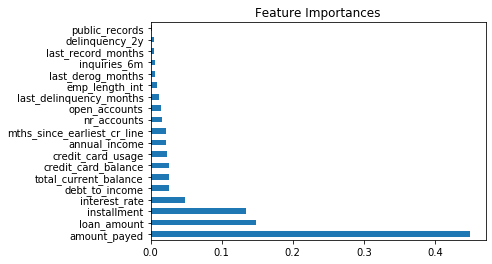

In [21]:
#Random Forest feature_importances_
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Feature Importances')

In [22]:
y = df['Is_Good']
x= df[['amount_payed','loan_amount','installment','interest_rate','debt_to_income']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

model.fit(x_train,y_train)
pred = model.predict(x_test)

print('RandomForestClassifier roc_auc_score:', roc_auc_score(y_test, pred))

RandomForestClassifier roc_auc_score: 0.9306514543443714


In [23]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      3463
           1       0.99      0.98      0.98     29400

    accuracy                           0.97     32863
   macro avg       0.92      0.93      0.93     32863
weighted avg       0.97      0.97      0.97     32863



Confusion matrix, without normalization
[[ 3043   420]
 [  512 28888]]
Normalized confusion matrix
[[0.87871787 0.12128213]
 [0.01741497 0.98258503]]


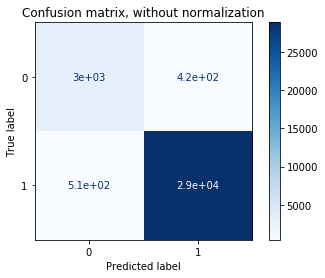

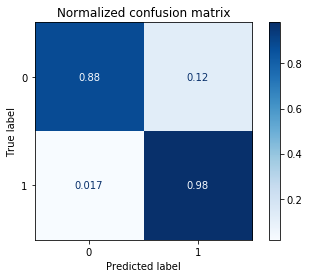

In [25]:
from sklearn.metrics import plot_confusion_matrix

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, x_test, y_test,
                                 
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()